# Kaggle Titanic Competition

**Author:** Dermot O'Brien
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Kaggle Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

## Data Understanding

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
# Import the data
example_submission = pd.read_csv('./Data/gender_submission.csv')
test = pd.read_csv('./Data/test.csv')
train = pd.read_csv('./Data/train.csv')

# Create a column for Test Passenger ID's used for final submission csv
test_ids = test['PassengerId']

### Training Set Exploration

In [3]:
# Check rows and columns
train.shape

(891, 12)

In [4]:
# See what the data looks like
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Check descriptive statistics
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Check for nulls
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing Data - Age: 177, Cabin: 687, Embarked: 2

Will probably drop Cabin, large number missing

In [7]:
train['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

Messy, will probably just drop

In [10]:
train[['Sex', 'Survived']].groupby('Sex', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


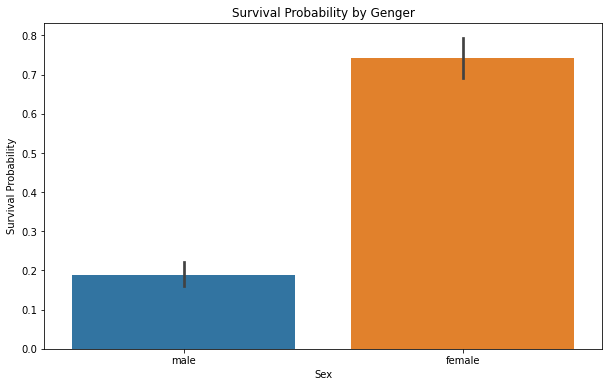

In [36]:
sns.barplot(x='Sex', y='Survived', data=train)
plt.rcParams["figure.figsize"] = (10,8)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Genger');

In [37]:
train[['Embarked', 'Survived']].groupby('Embarked', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


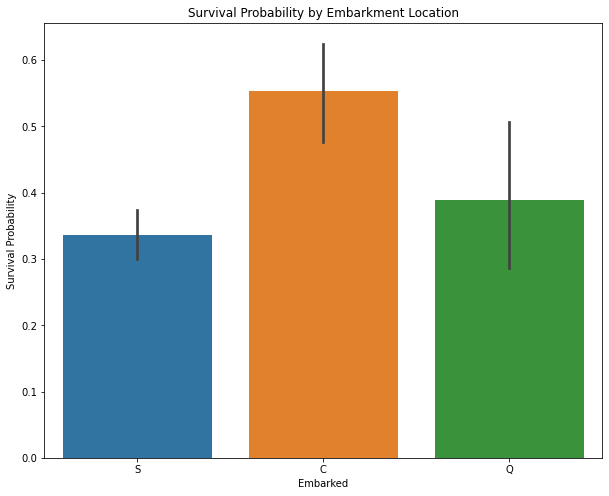

In [39]:
sns.barplot(x='Embarked', y='Survived', data=train)
plt.rcParams["figure.figsize"] = (10,10)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Embarkment Location');

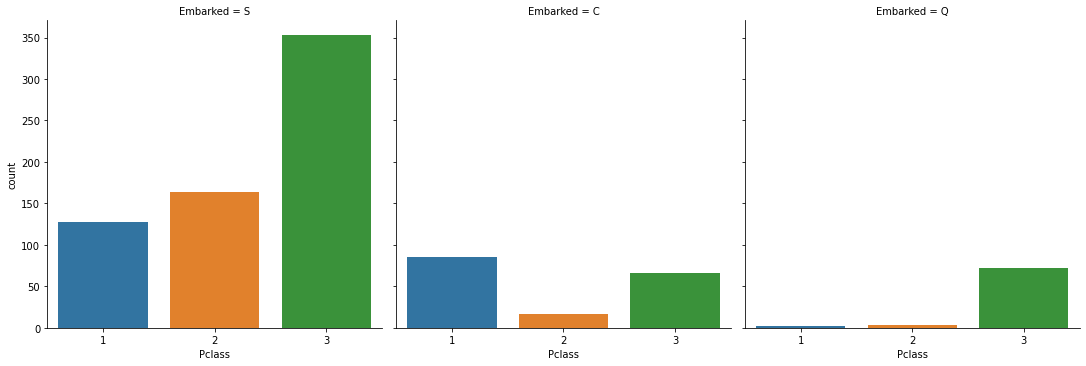

In [56]:
sns.catplot(x='Pclass', col='Embarked', data=train, kind='count')
sns.color_palette("crest", as_cmap=True)
plt.rcParams["figure.figsize"] = (10,8);

<AxesSubplot:>

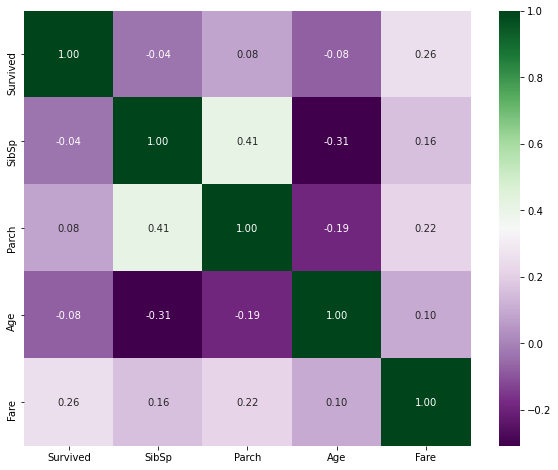

In [57]:
sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot=True, fmt='.2f', cmap='PRGn')

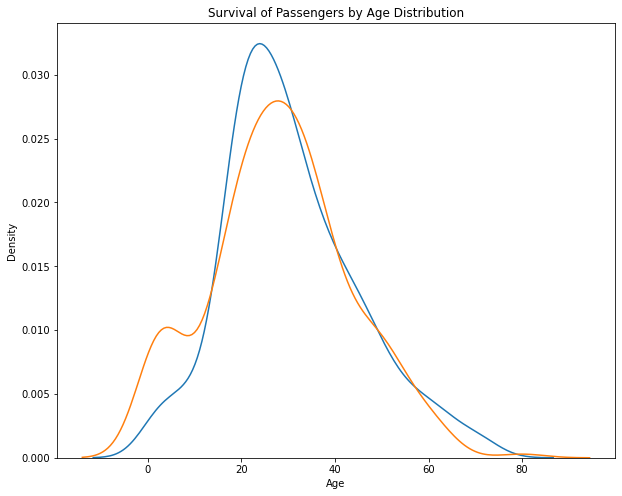

In [60]:
sns.kdeplot(train['Age'][train['Survived'] == 0], label='Did Not Survive')
sns.kdeplot(train['Age'][train['Survived'] == 1], label='Survived')
plt.rcParams["figure.figsize"] = (10,8)
plt.xlabel('Age')
plt.title('Survival of Passengers by Age Distribution');

__Conclusions__

At first glance, their are a few columns I want to drop and a few columns I want to transform. 

__Drop__
Cabin has 687 missing values (77% of the values), so we will drop that column. Cabin has nulls and seems very messy, so for the sake of time we will drop that as well. Name can be useful given if we were to sparse the titles, but that would require a ton of feature engineering. In a future iteration we can look to include Name, but to simplify this example we are going to drop it. Passenger ID is also unhelpful to predict survival rate, so that will be dropped as well

__Transform__
There are two columns that need to be tranformed into numeric values: Sex and Embarked. For Sex, we can use an encoder to make "Female" = 0 and "Male" = 1

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [ ]:
# Create a function that cleans the data set given

def clean(data):
    
    data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)
    
    cols = ['SibSp', 'Parch', 'Fare', 'Age']
    for col in cols:
        data[col].fillna(data[col].median(), inplace=True)
        
    data.Embarked.fillna('U', inplace=True)
    
    return data

As shown above Sex: female = 0, male = 1 & Embarked: C = 0, Q = 2, S = 3, U = 4

In [ ]:
clean(train)

In [ ]:
train.isna().sum()

Data points have been dropped and null numeric values have been substituted with the mean value of that column

In [ ]:
# Change Sex and Embarked to numeric values using Label Encoder

encoder = preprocessing.LabelEncoder()

cols = ['Sex', 'Embarked']

for col in cols:
    train[col] = encoder.fit_transform(train[col])
    test[col] = encoder.transform(test[col])
    print(encoder.classes_)
    
train.head()

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [ ]:
# Create models
y = train['Survived']
X = train.drop('Survived', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=None, random_state=42)

In [ ]:
# Insantiate classifier
clf = LogisticRegression().fit(X_train, y_train)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

# Calculate accuracy of model on test set
accuracy_score(y_test, predictions)

In [ ]:
# Calculate accuracy of model on training set
score = clf.score(X_train, y_train)
score

In [ ]:
# An array of our models predictions (whether or not someobody survived)
predictions

In [ ]:
test

In [ ]:
clean(test)

In [ ]:
submission_preds = clf.predict(test)

In [ ]:
test_df = pd.DataFrame({'PassengerId':test_ids.values, 'Survived': submission_preds})

In [ ]:
test_df.to_csv('./Submission/titanic_submission.csv', index=False)

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***